In [42]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
plt.style.use("ggplot")
# plot inline
%matplotlib inline

df = pd.read_pickle('/home/hermuba/data/drug/tmacc_df')
df.drop('ACTIVITY', axis=1, inplace=True)
df.set_index('chem_name', drop=True, append=False, inplace=True)

new_df = df.fillna(0)

norm_df = new_df.apply(lambda x: (x - x.mean()) / x.std(), axis=0)
norm_df.dropna(axis = 1, inplace = True) # some std = 0, provide no info therefore remove them

In [43]:
anno_abx = pd.read_pickle("/home/hermuba/data/drug/anno_abx_class")
color_list = ['maroon', 'firebrick', 'salmon','chocolate', 'goldenrod', 'yellowgreen', 'mediumseagreen', 'forestgreen','royalblue', 'midnightblue', 'indigo', 
             'magenta', 'palevioletred', 'saddlebrown','grey', 'black']

In [44]:
lactam_only = norm_df.loc[norm_df.index.isin(anno_abx.loc[anno_abx['order']<5]['drug'])]

In [52]:
from scipy.cluster.hierarchy import dendrogram, linkage
def dendro_with_class(df):
    plt.figure(figsize=(25, 10))
    dendrogram(linkage(df), labels = df.index, orientation = 'top', leaf_font_size = 20)
    ax = plt.gca() 
    x_tick = ax.get_xticks()
    
    x_labels = ax.get_xmajorticklabels()
    for i in range(len(x_labels)):
        drug_name = x_labels[i].get_text()

        order = int(anno_abx.loc[anno_abx['drug']== drug_name]['order'])

        c = color_list[order]

        circ = plt.Circle((x_tick[i], -30), radius = 3, color = c, clip_on = False)
        ax.add_patch(circ)



In [46]:
sorted_index = anno_abx.loc[anno_abx['drug'].isin(list(df.index))].sort_values(by= 'order')['drug']

In [47]:
def color_map(df):
    m = df.as_matrix()
    plt.figure(figsize = (20,30))
    m = np.ma.masked_where(np.isnan(m),m)
    plt.pcolor(m, cmap='rainbow', vmin=1, vmax=5)
    plt.xticks(np.arange(0.5, len(sub_matrix.columns), 1), df.columns, rotation = 90)
    plt.yticks(np.arange(0.5, len(sub_matrix.index), 1), df.index)
    plt.colorbar(orientation='horizontal')
    plt.show()

KeyboardInterrupt: 

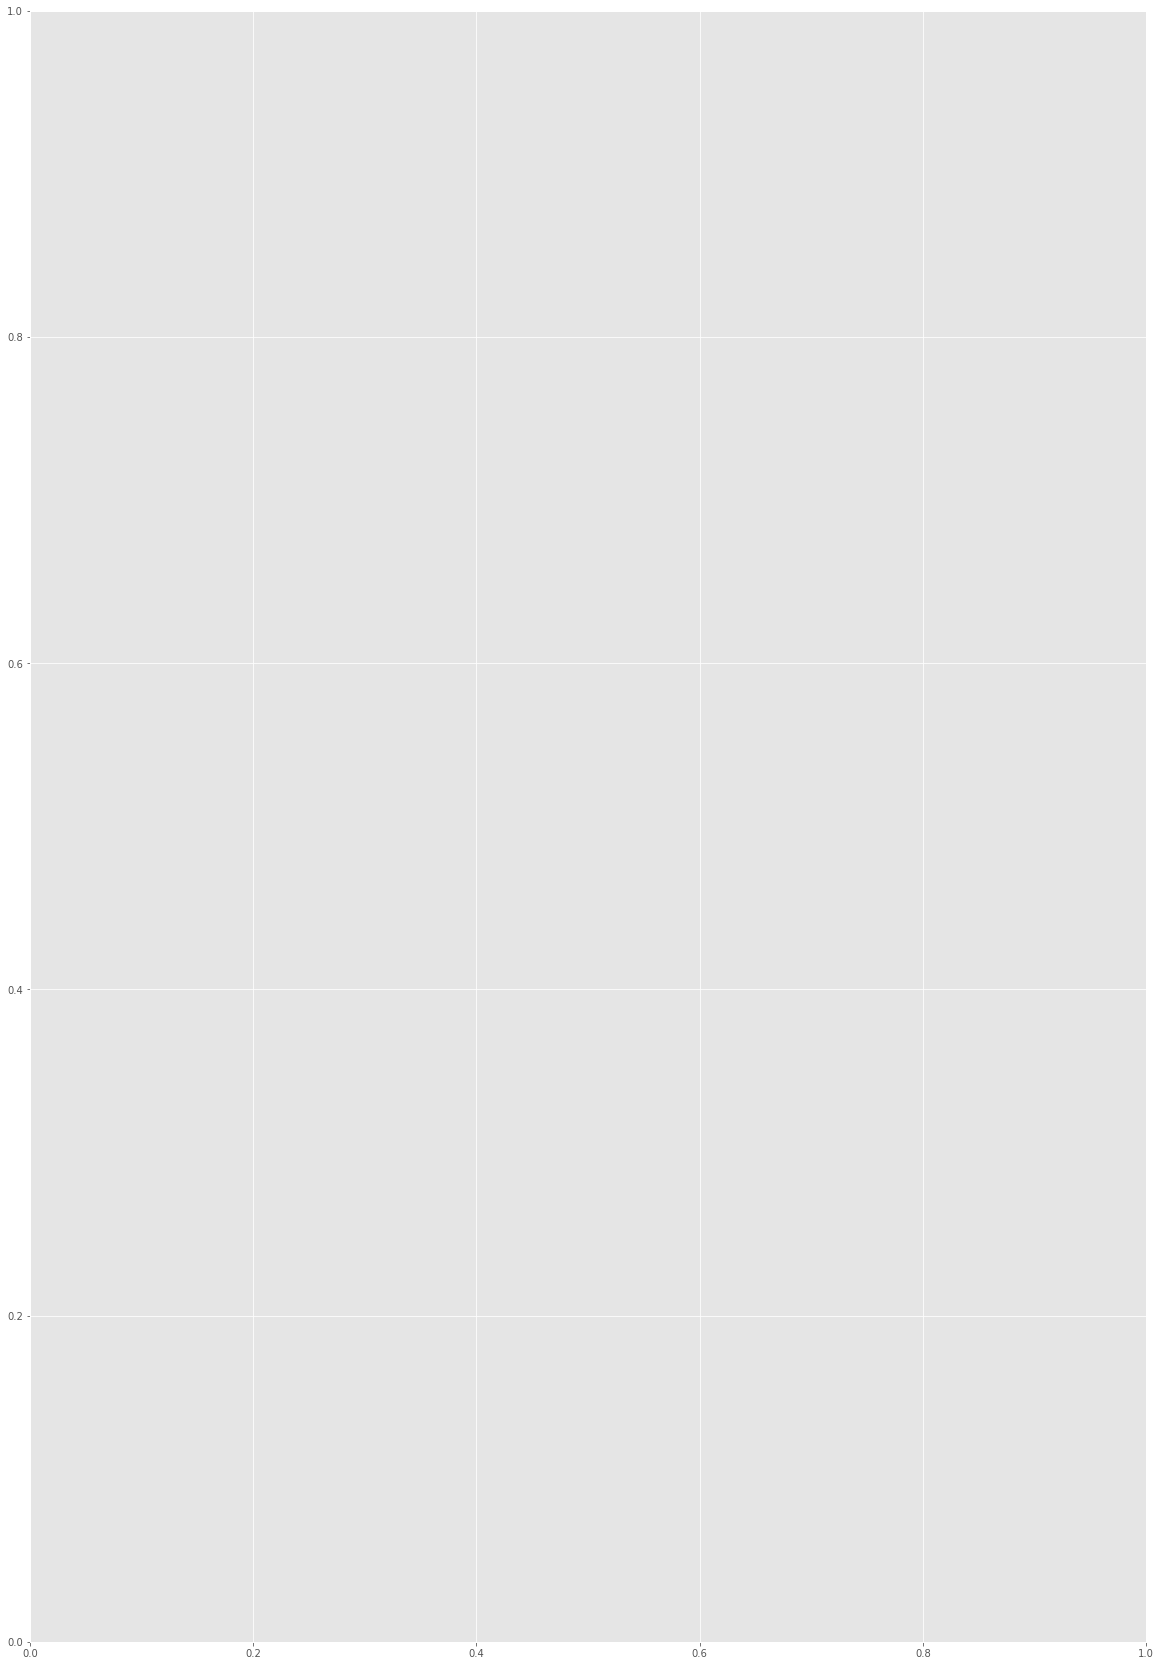

In [48]:
#color_map(norm_df.loc[sorted_index, :])

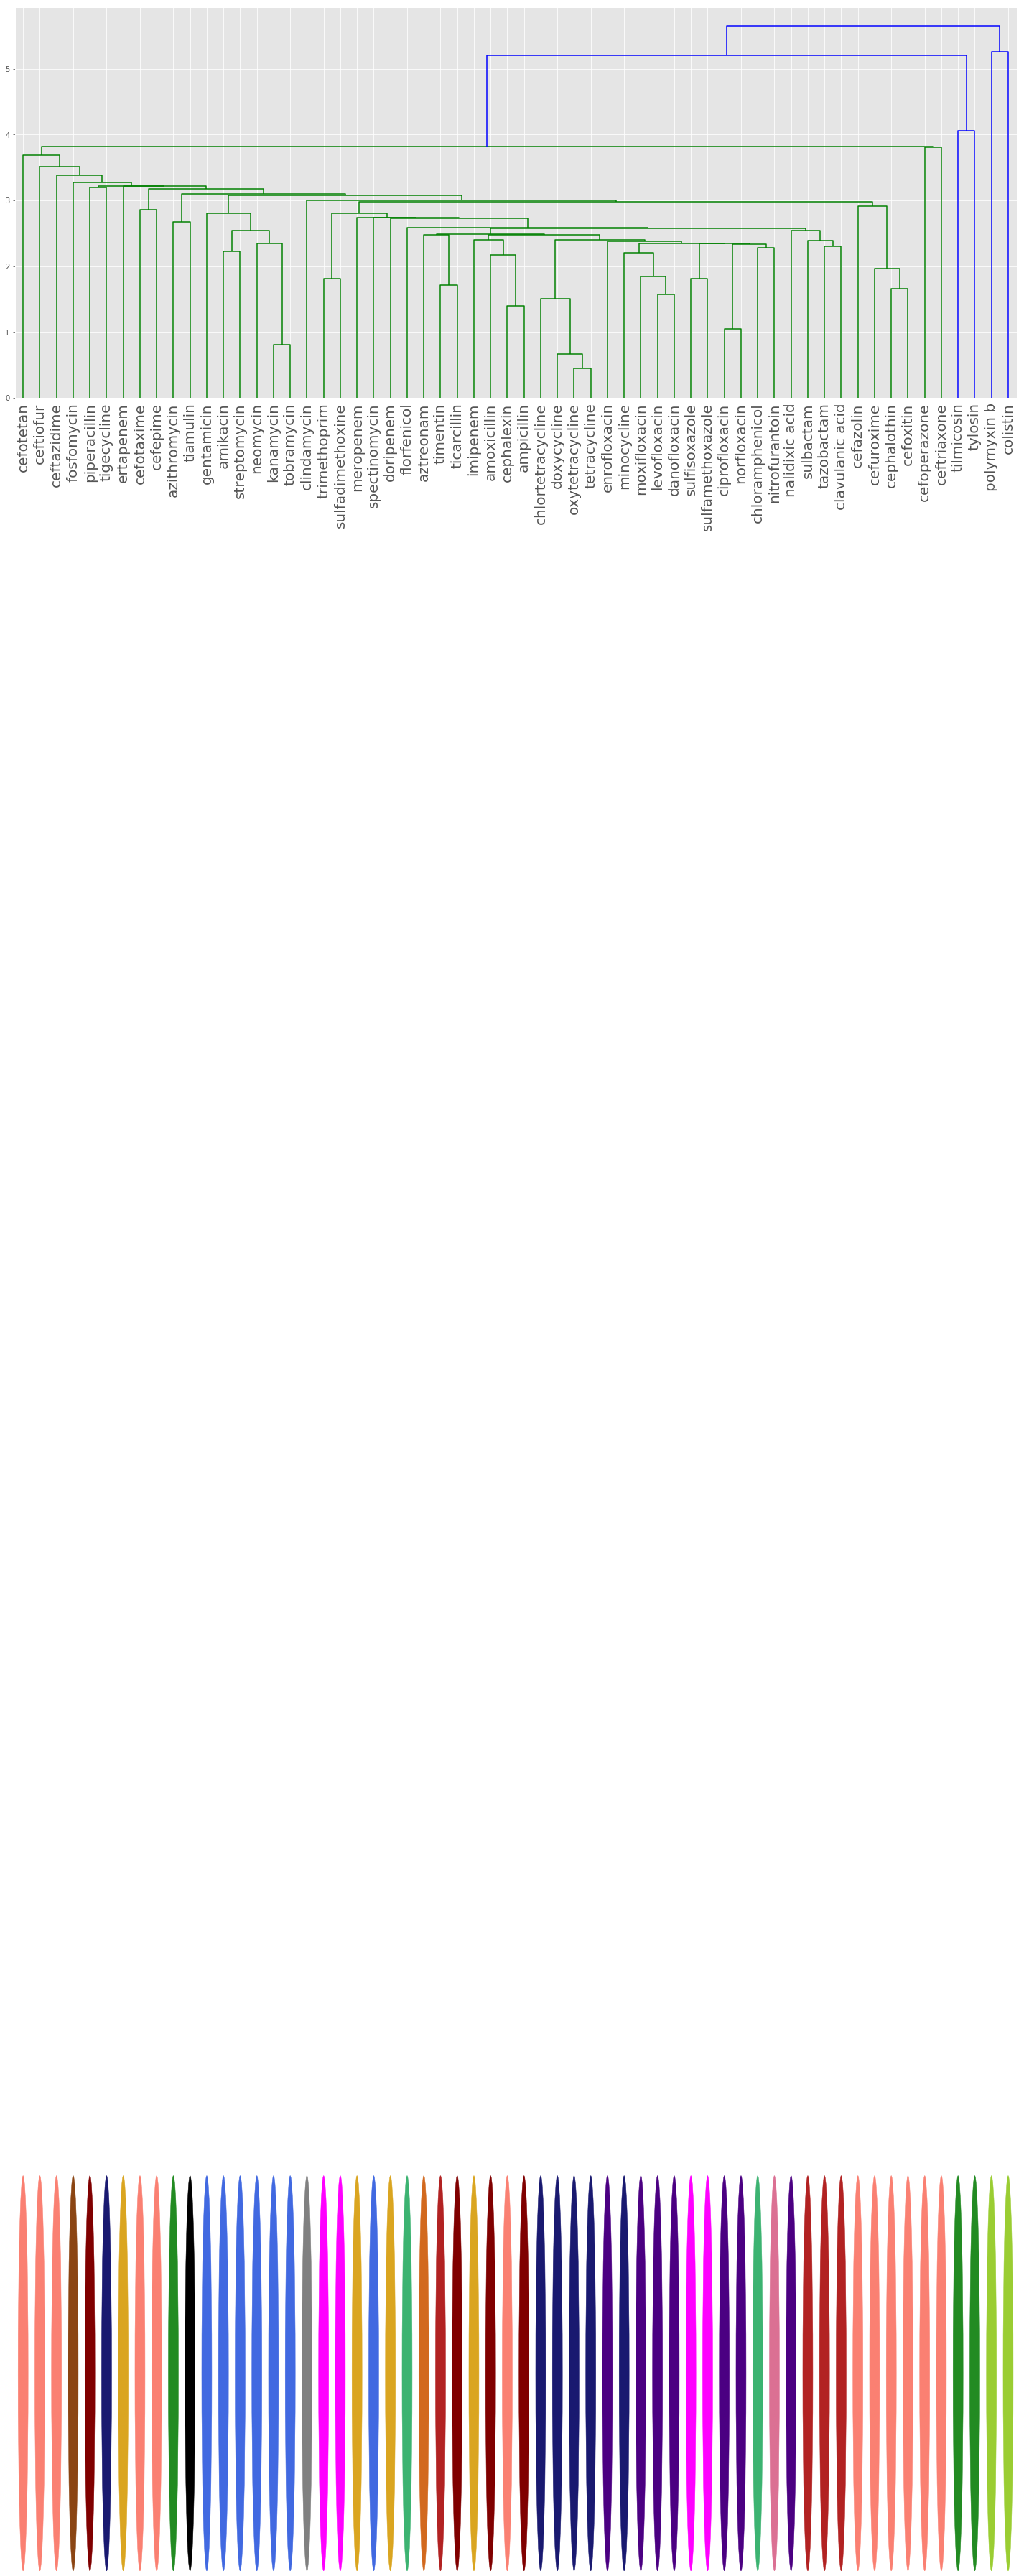

In [53]:
dendro_with_class(df.iloc[:, 1:])

In [ ]:
dendro_with_class(norm_df)

In [ ]:
dendro_with_class(lactam_only)

[ 0.37122139  0.14842142  0.07125287  0.05010756  0.04325019  0.03962725
  0.02666252  0.02354545  0.02284477  0.01843441  0.01562406  0.01462007
  0.01239273  0.0104044   0.00969922  0.00908719  0.00835599  0.00716762
  0.00655857  0.00653199  0.00567189  0.0054797   0.00519044  0.00479186
  0.00475213  0.00425795  0.00384594  0.003733    0.00356358  0.00343926]
[ 138.11841374   87.3340059    60.51126879   50.74423701   47.1442867
   45.12654419   37.01567464   34.78472866   34.2632445    30.77865695
   28.33557763   27.41005067   25.23588288   23.12297244   22.32562249
   21.60975969   20.72210714   19.19210634   18.35861004   18.32136555
   17.07257332   16.78082559   16.33191587   15.69231531   15.62712969
   14.79229006   14.05840616   13.85046323   13.53250455   13.29435773]


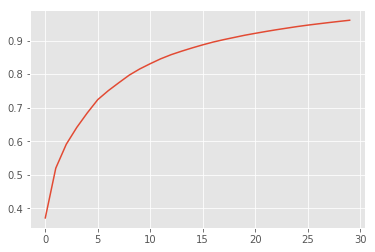

In [54]:
import numpy as np
from sklearn.decomposition import PCA
X = norm_df
pca = PCA(n_components=30)
pca.fit(X)
pc = pca.fit_transform(X, X.index)
print(pca.explained_variance_ratio_)  

print(pca.singular_values_)  

plt.plot(np.cumsum(np.array(pca.explained_variance_ratio_)))


In [ ]:
len(pc)

In [ ]:
plt.plot(np.cumsum(np.array(pca.explained_variance_ratio_)))
plt.ylabel("explained variance")
plt.xlabel("No. of Principle Components")

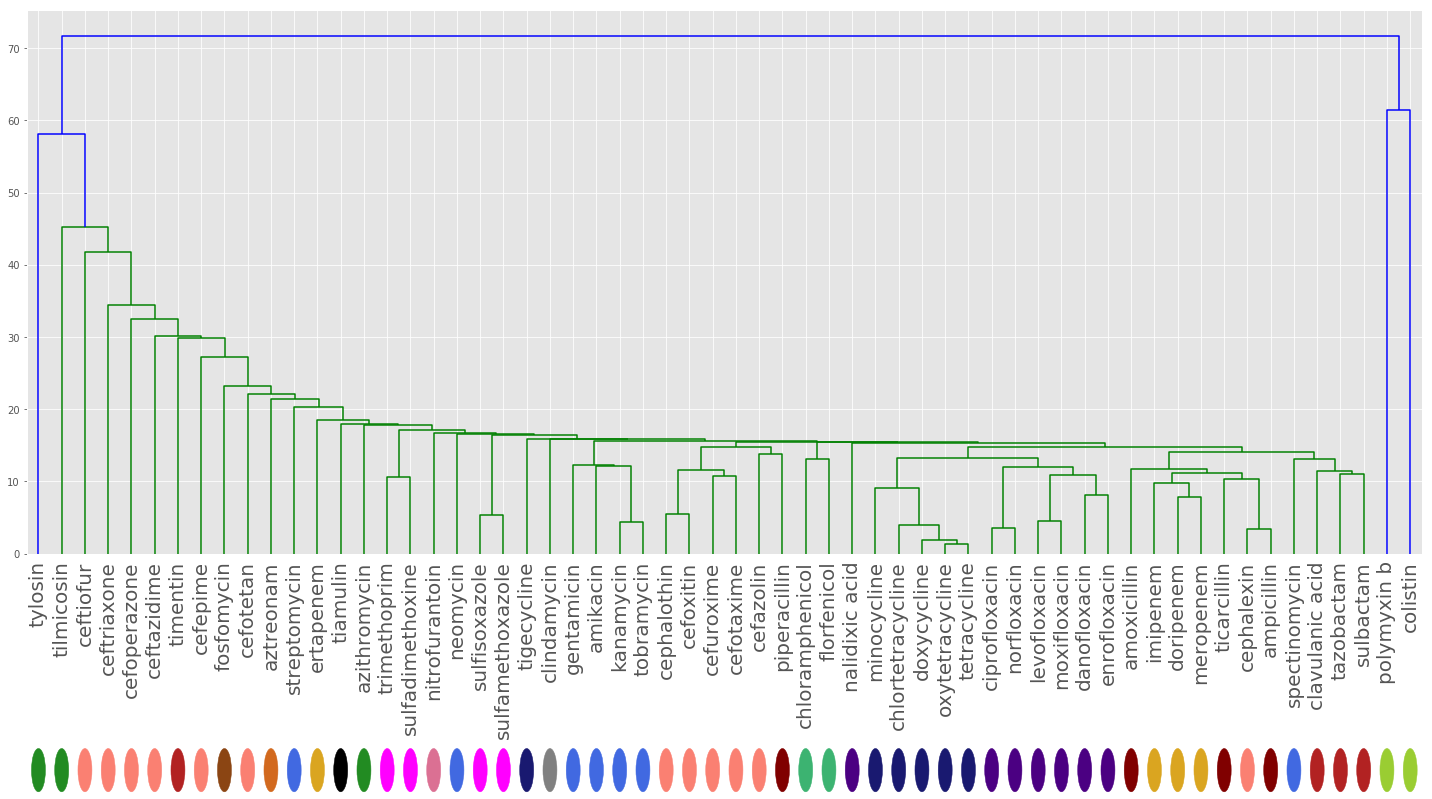

In [55]:
tmacc_pca = pd.DataFrame(pc, index = norm_df.index)
dendro_with_class(tmacc_pca)

In [ ]:
plt.scatter(pc[:,0], pc[:,1], label = X.index)

In [ ]:
first = []
snd = []
third = []
four = []
for i in list(df.columns):
    lists = i.split(':')
    first.append(lists[0])
    snd.append(lists[2])
    third.append(lists[2])
    four.append(lists[3])
print(set(first))

In [ ]:
print(set(snd))

In [ ]:
print(set(third))

In [ ]:
print(len(set(four)))

In [ ]:
# correlation
plt.figure(figsize = (15,15))
plt.matshow(norm_df.corr(), cmap = 'rainbow', fignum=1)
#plt.xticks(np.arange(0, len(norm_df.columns), 1), norm_df.columns, rotation = 90)
#plt.yticks(np.arange(0, len(norm_df.columns), 1), norm_df.columns)
plt.colorbar(orientation='horizontal')
plt.show()
# some are highly correlated

In [ ]:
correlation = norm_df.corr()
indices = np.where(correlation == 1)
indices = [(correlation.index[x], correlation.columns[y]) for x, y in zip(*indices)
                                        if x != y and x < y]

In [ ]:
all_indice = set()
pre_existing_sets = [set()]
for pairs in indices:
    pairs = set(pairs)
    all_indice = all_indice.union(pairs)
for i in all_indice:
    
        

In [ ]:
type(indice)


In [ ]:
len(all_indice)

In [ ]:
indices